In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold,RepeatedKFold,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier,DecisionTreeClassifier,plot_tree,export_text
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,ExtraTreesClassifier,ExtraTreesRegressor,BaggingClassifier
from sklearn.ensemble import BaggingRegressor,AdaBoostClassifier,AdaBoostRegressor,GradientBoostingClassifier,GradientBoostingRegressor
from catboost import CatBoostRegressor,CatBoostClassifier
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor
from sklearn.svm import SVC,SVR,LinearSVC,LinearSVR
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.cluster import OPTICS,Birch,SpectralClustering,KMeans,MeanShift,MiniBatchKMeans,DBSCAN,AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.datasets import make_classification

In [5]:
X,y=make_classification(n_samples=1000,n_features=2,n_classes=2,n_clusters_per_class=2,n_redundant=0)

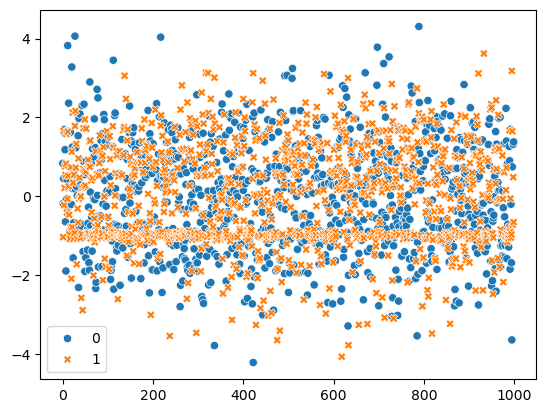

In [6]:
sns.scatterplot(X)
plt.show()

In [8]:
Xtr,Xte,ytr,yte=train_test_split(X,y,test_size=0.25,random_state=10)
Xtr.shape

(750, 2)

In [9]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

rbf=SVC()  #kernel default is rbf
rbf.fit(Xtr,ytr)
ypred=rbf.predict(Xte)
acc_rbf=accuracy_score(yte,ypred)
print(f"acc score {acc_rbf}")
print(f"classification report {classification_report(yte,ypred)}")

acc score 0.96
classification report               precision    recall  f1-score   support

           0       0.98      0.93      0.96       122
           1       0.94      0.98      0.96       128

    accuracy                           0.96       250
   macro avg       0.96      0.96      0.96       250
weighted avg       0.96      0.96      0.96       250



In [10]:
lin=SVC(C=1,kernel='linear')
lin.fit(Xtr,ytr)
ypred1=lin.predict(Xte)
acc_lin=accuracy_score(yte,ypred1)
print(f"acc score {acc_lin}")
print(f"classification report {classification_report(yte,ypred1)}")

acc score 0.872
classification report               precision    recall  f1-score   support

           0       0.88      0.86      0.87       122
           1       0.87      0.88      0.88       128

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



In [11]:
pol=SVC(C=1,kernel='poly')
pol.fit(Xtr,ytr)
ypred2=pol.predict(Xte)
acc_pol=accuracy_score(yte,ypred2)
print(f"acc score {acc_pol}")
print(f"classification report {classification_report(yte,ypred2)}")

acc score 0.86
classification report               precision    recall  f1-score   support

           0       0.82      0.92      0.86       122
           1       0.91      0.80      0.85       128

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.87      0.86      0.86       250



In [12]:
sig=SVC(C=1,kernel='sigmoid')
sig.fit(Xtr,ytr)
ypred3=sig.predict(Xte)
acc_sig=accuracy_score(yte,ypred3)
print(f"acc score {acc_sig}")
print(f"classification report {classification_report(yte,ypred3)}")

acc score 0.8
classification report               precision    recall  f1-score   support

           0       0.79      0.80      0.80       122
           1       0.81      0.80      0.80       128

    accuracy                           0.80       250
   macro avg       0.80      0.80      0.80       250
weighted avg       0.80      0.80      0.80       250



In [13]:
acc=pd.DataFrame(columns=['kernel_name','acc_score'])
acc['kernel_name']=['acc_rbf','acc_lin','acc_pol','acc_sig']
acc['acc_score']=[acc_rbf,acc_lin,acc_pol,acc_sig]
acc

,kernel_name,acc_score
0,acc_rbf,0.960
1,acc_lin,0.872
2,acc_pol,0.860
3,acc_sig,0.800


In [14]:
params={'C':[1,0.1,10,100],
        'gamma':[0.1,1,0.01,0.001],
        'kernel':['rbf','sigmoid','poly','linear']}
gsv=GridSearchCV(SVC(),param_grid=params,refit=True,cv=5)
gsv.fit(Xtr,ytr)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 0.1, 10, 100], 'gamma': [0.1, 1, 0.01, 0.001],
                         'kernel': ['rbf', 'sigmoid', 'poly', 'linear']})

In [15]:
gsv.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [17]:
model=SVC(C=1,gamma=1,kernel='rbf')
model.fit(Xtr,ytr)
ypred0=model.predict(Xte)
acc_model=accuracy_score(yte,ypred0)
print(f"acc score {acc_model}")
print(f"classification report {classification_report(yte,ypred0)}")

acc score 0.968
classification report               precision    recall  f1-score   support

           0       0.98      0.95      0.97       122
           1       0.95      0.98      0.97       128

    accuracy                           0.97       250
   macro avg       0.97      0.97      0.97       250
weighted avg       0.97      0.97      0.97       250

